In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [28]:
music_data = pd.read_csv('Data/music.csv')
music_data.head()

age gender   genre
0  20      1  HipHop
1  23      1  HipHop
2  25      1  HipHop
3  25      1  HipHop
4  26      1    Jazz

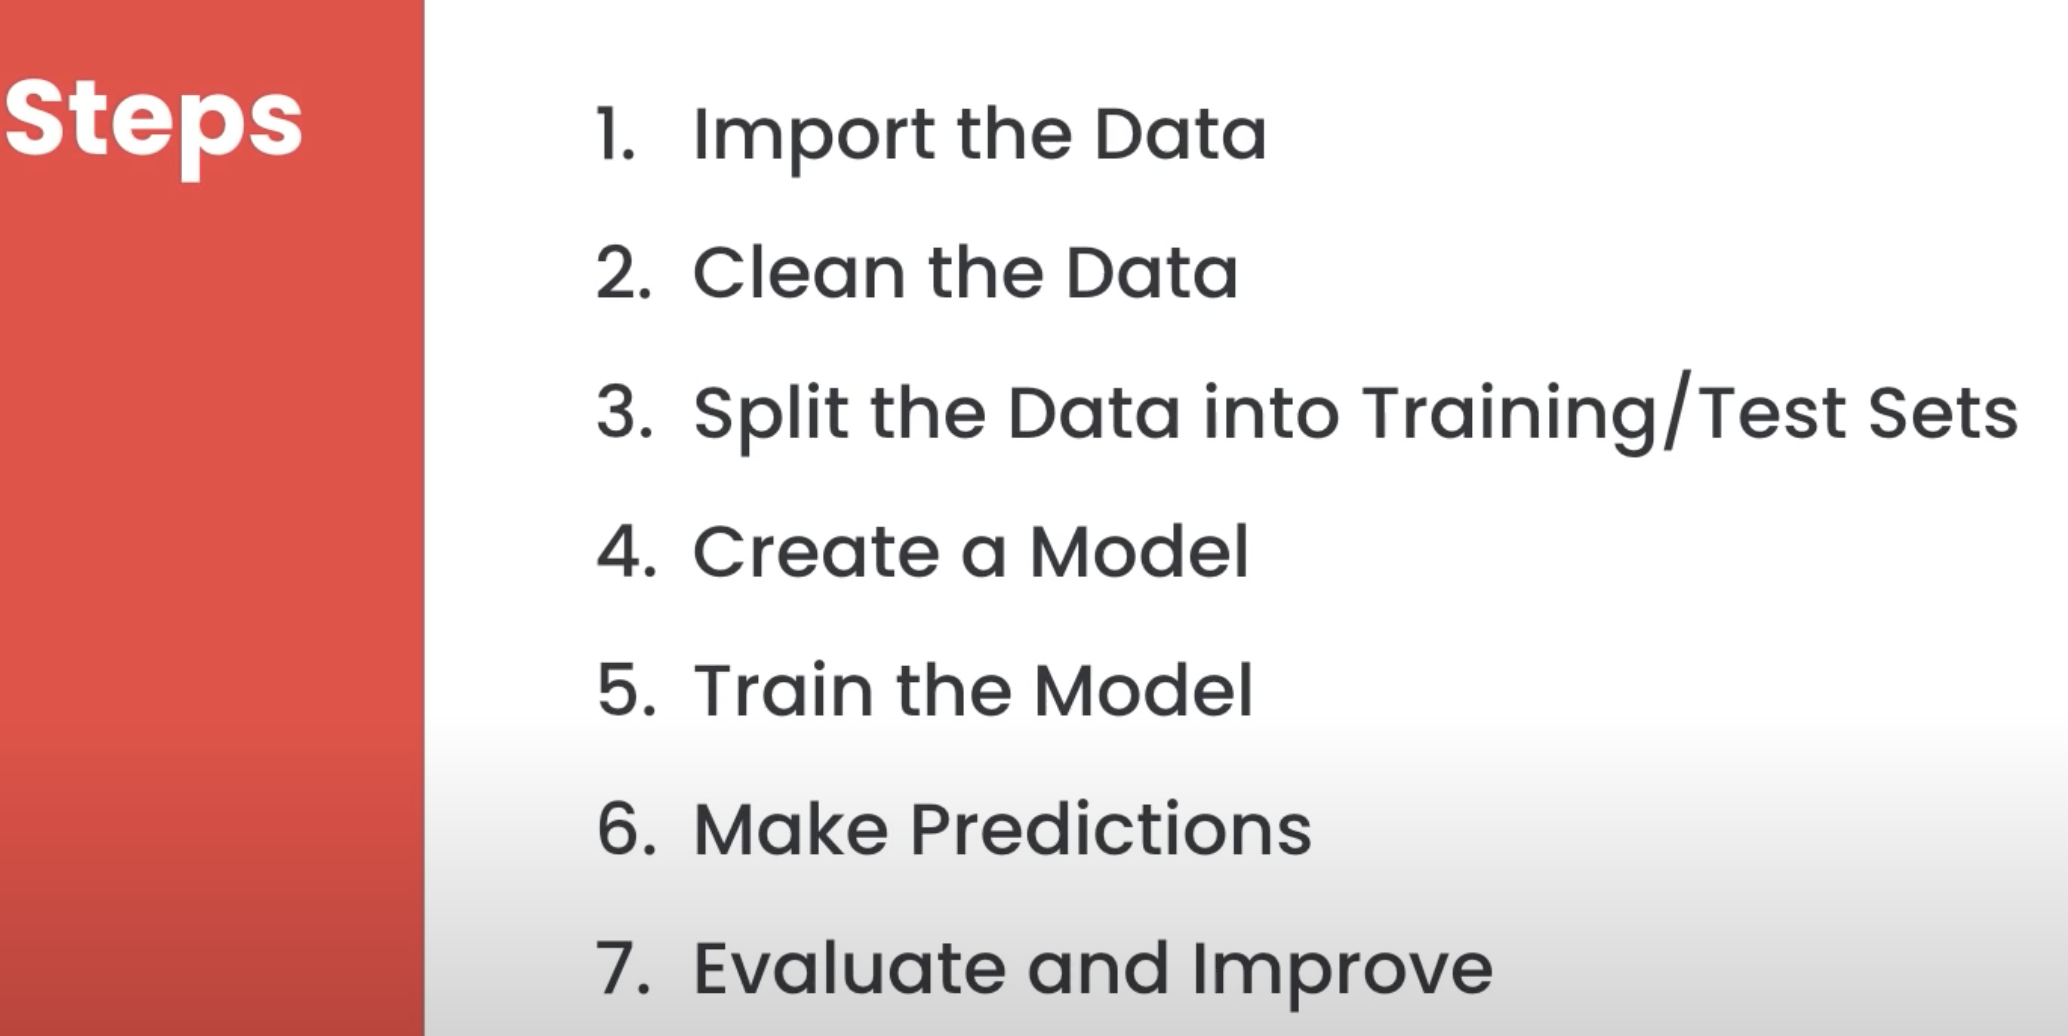

# Import the Data


In [29]:
# Import the Data
music_data = pd.read_csv('Data/music.csv')
music_data

age gender      genre
0   20      1     HipHop
1   23      1     HipHop
2   25      1     HipHop
3   25      1     HipHop
4   26      1       Jazz
5   29      1       Jazz
6   30      1       Jazz
7   31      1  Classical
8   32      -  Classical
9   33      1  Classical
10  37      1  Classical
11  20      0      Dance
12  21      0      Dance
13  25      0      Dance
14   ?      0      Dance
15  26      0   Acoustic
16  27      0   Acoustic
17  30      0   Acoustic
18  30      0   Acoustic
19  31      0  Classical
20  34      0  Classical
21  35      0  Classical

# Clean the Data

In [30]:
music_data.age.str.isnumeric()
music_data.gender.str.isnumeric()

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
Name: gender, dtype: bool

In [31]:
music_data.drop(music_data.index[music_data['age'] == '?'], inplace=True)
music_data.drop(music_data.index[music_data['gender'] == '-'], inplace=True)
music_data.reset_index(drop=True, inplace=True)
music_data

age gender      genre
0   20      1     HipHop
1   23      1     HipHop
2   25      1     HipHop
3   25      1     HipHop
4   26      1       Jazz
5   29      1       Jazz
6   30      1       Jazz
7   31      1  Classical
8   33      1  Classical
9   37      1  Classical
10  20      0      Dance
11  21      0      Dance
12  25      0      Dance
13  26      0   Acoustic
14  27      0   Acoustic
15  30      0   Acoustic
16  30      0   Acoustic
17  31      0  Classical
18  34      0  Classical
19  35      0  Classical

In [32]:
duplicatedRows = music_data[music_data.duplicated()]
duplicatedRows

age gender     genre
3   25      1    HipHop
16  30      0  Acoustic

In [33]:
music_data.drop_duplicates(inplace=True)
music_data.reset_index(drop=True, inplace=True)
music_data

age gender      genre
0   20      1     HipHop
1   23      1     HipHop
2   25      1     HipHop
3   26      1       Jazz
4   29      1       Jazz
5   30      1       Jazz
6   31      1  Classical
7   33      1  Classical
8   37      1  Classical
9   20      0      Dance
10  21      0      Dance
11  25      0      Dance
12  26      0   Acoustic
13  27      0   Acoustic
14  30      0   Acoustic
15  31      0  Classical
16  34      0  Classical
17  35      0  Classical

# Split the Data

In [34]:
X = music_data.drop(columns=['genre'])
X

age gender
0   20      1
1   23      1
2   25      1
3   26      1
4   29      1
5   30      1
6   31      1
7   33      1
8   37      1
9   20      0
10  21      0
11  25      0
12  26      0
13  27      0
14  30      0
15  31      0
16  34      0
17  35      0

In [35]:
y = music_data['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train & Predict the model

In [37]:
model.fit(X,y)
music_data

age gender      genre
0   20      1     HipHop
1   23      1     HipHop
2   25      1     HipHop
3   26      1       Jazz
4   29      1       Jazz
5   30      1       Jazz
6   31      1  Classical
7   33      1  Classical
8   37      1  Classical
9   20      0      Dance
10  21      0      Dance
11  25      0      Dance
12  26      0   Acoustic
13  27      0   Acoustic
14  30      0   Acoustic
15  31      0  Classical
16  34      0  Classical
17  35      0  Classical

In [38]:
predictions = model.predict([[21,1], [22, 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array(['Jazz', 'Jazz', 'Classical', 'Dance'], dtype=object)

# Evaluate accuracy

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

1.0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
score

1.0

# Persisting Models

In [43]:
import joblib

X = music_data.drop(columns=['genre'])
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X, y)

joblib.dump(model, 'music-recommender.joblib')

['music-recommender.joblib']

In [44]:
joblib.load('music-recommender.joblib')
predictions = model.predict([ [21, 1] ])
predictions

array(['HipHop'], dtype=object)

# <b> END OF EXAMPLE SESSION 1

# <b> START OF EXAMPLE SESSION 2

# <b> Ease of doing ML analysis with PyCaret

#### PyCaret
+ PyCaret is an open-source, low-code machine learning library written in Python that allows you to quickly go from data preparation to model implementation in seconds, saving you hundreds of lines of Python code.

+ It includes several popular ML and data science libraries with its official website at https://pycaret.org/

In [45]:
#### Installation
# !pip install pycaret

# Loading data

In [46]:
df = pd.read_csv('Data/heart_failure_clinical_records_dataset.csv')

# First look at the data 

In [47]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

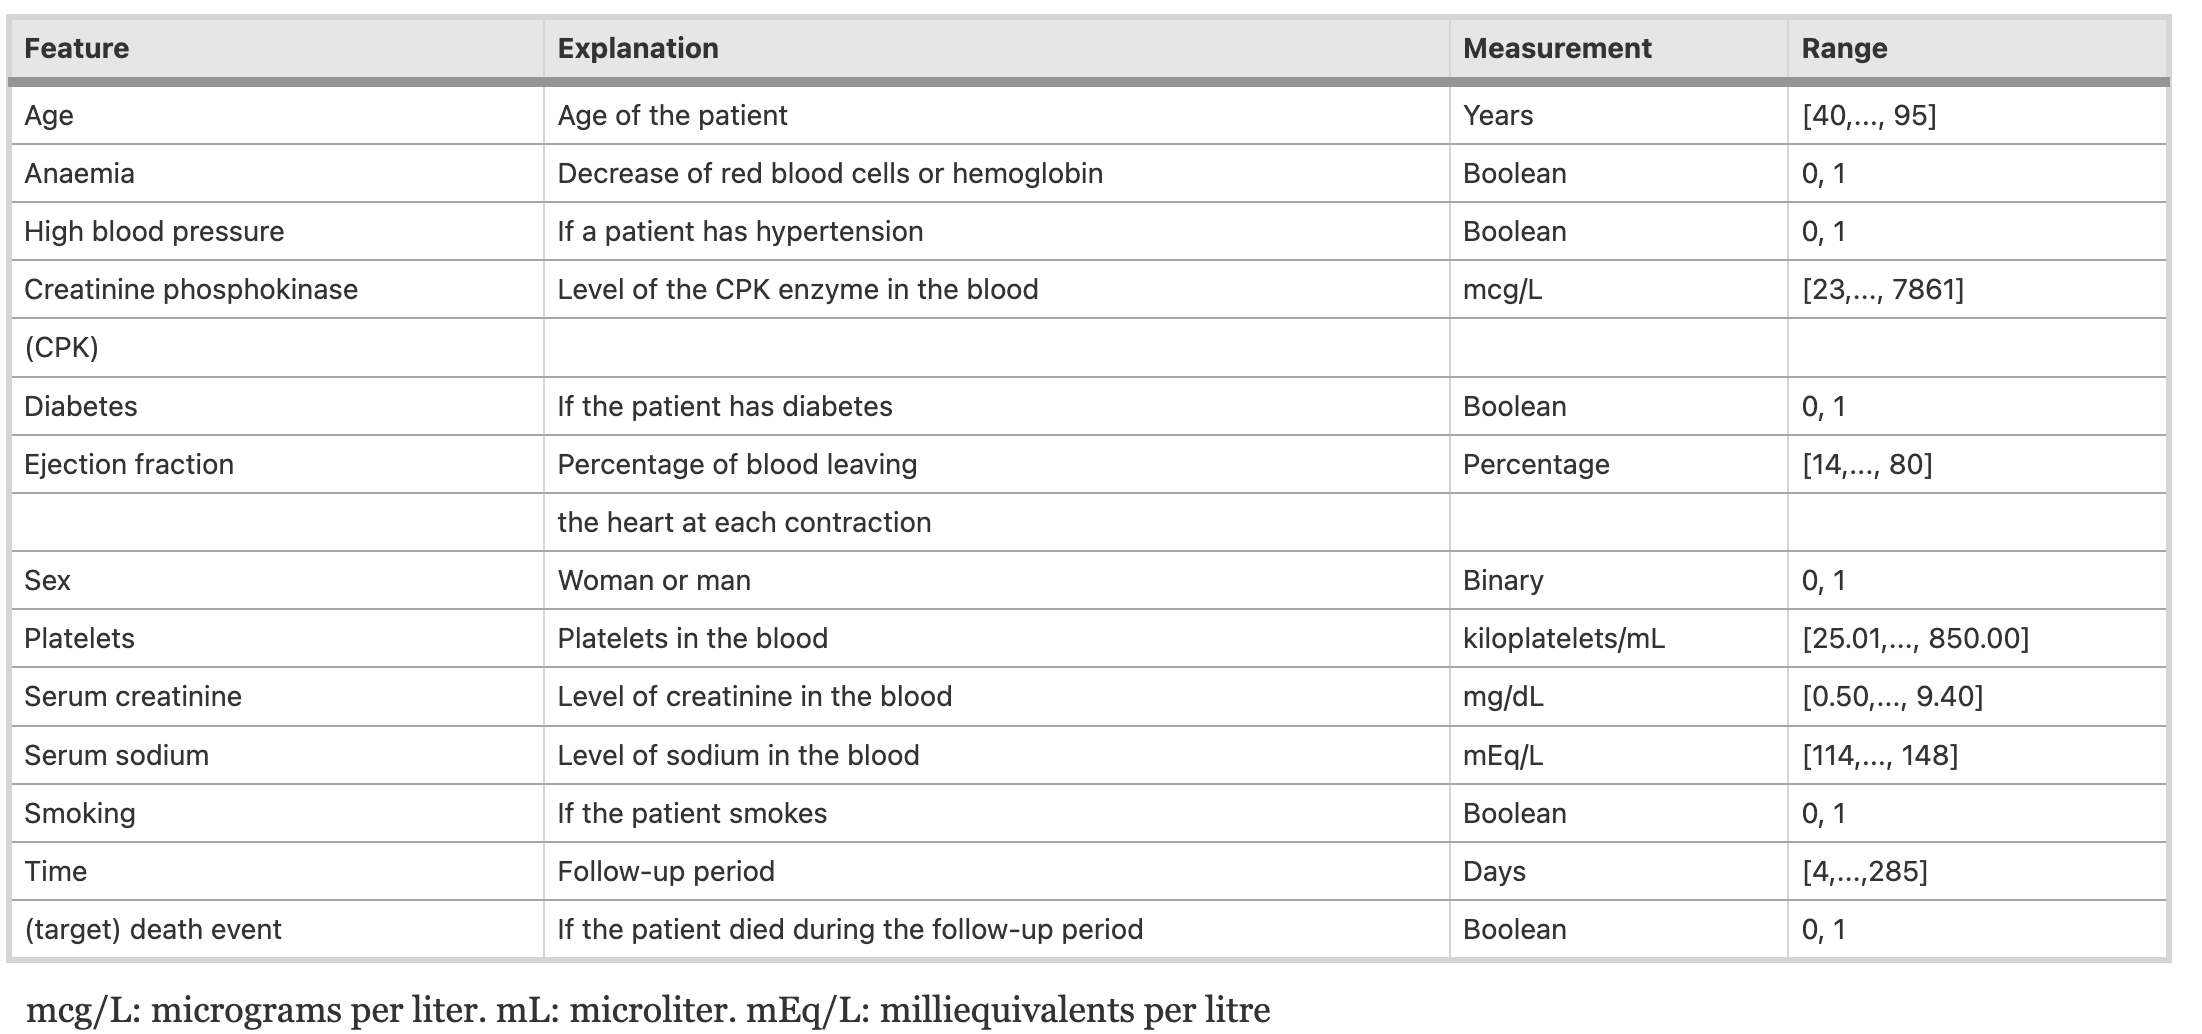

In [48]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

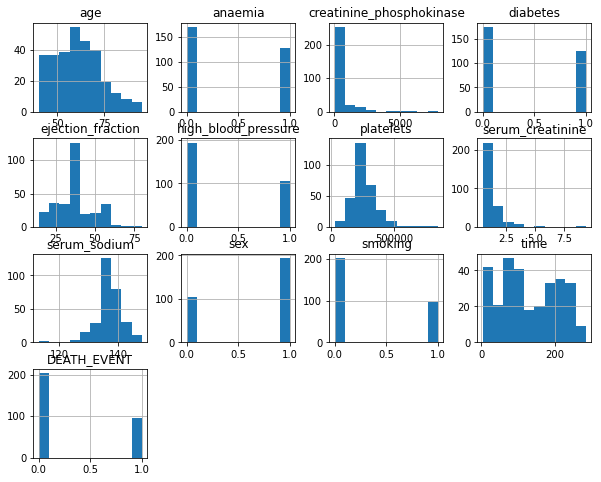

In [49]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [50]:
df.shape

(299, 13)

# Cleaning data

In [51]:
df.isnull().sum()
df.duplicated().sum()

0

In [52]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [53]:
df.rename(columns={'DEATH_EVENT': 'label'}, inplace=True)

In [54]:
df['label'].value_counts()

0    203
1     96
Name: label, dtype: int64

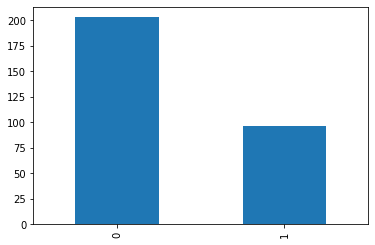

In [55]:
df['label'].value_counts().plot(kind='bar');

# Using PyCaret for ML

## Import

In [1]:
import pycaret.classification as pc
# You might need to import like this:
# from pycaret import *
# import pycaret

## Initialization

In [57]:
clf = pc.setup(data=df, fold_shuffle=True, target='label')

### Confusion Matrix

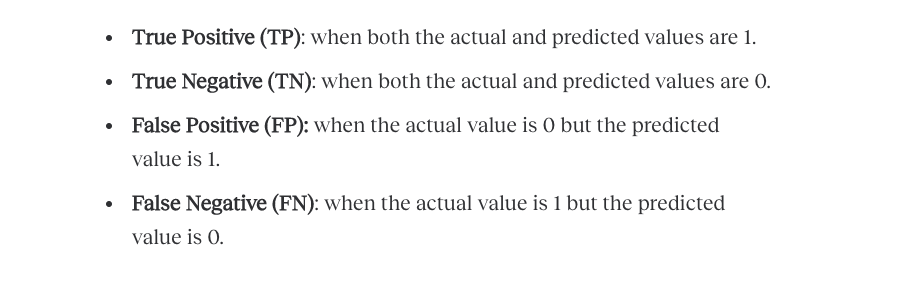

#### Compare Clasification Model with their Metrics
+ For Classification Problems
  - Accuracy is the number of correct predictions divided by the total number of predictions: Accuaracy = (TP+TN) / (TP+TN+FP+FN) 
  - Precision is the number of True Positives (TP) divided by the sum of TP & FP: Precision = TP / (TP+FP)
  - Recall uses the same principle as Precision, except the focus is now on the False Negatives instead of the False Recall: TP / (TP+FN) 
  - F1 takes into consideration both Precision and Recall: 2(Precision * Recall) / (Precision + Recall) 
  - AUC measures seperability between TN & TP
  - Kappa is frequently used to test interrater reliability. 
  - MCC takes into account all four values in the confusion matrix: (TP*TN - FP-*FN) / sqrt((TP+FP)(TP+FN)(TN+FP)(TN+FN)) | A high value means that both classes (trues and negatives) are predicted well.
+ For Regression Problems
  - MAE, MSE, RMSE, R2, RMSLE and MAPE
  
 
 

## Train (& Evaluate) Model 

In [58]:
pc.compare_models()

### Overview of PyCaret
+ Pycaret builds a model using several algorithms and compares the best
+ It automatically sort them from the best accuracy to the worst 
+ It highlightx the best model according to the classification metrics


## Create Model


In [59]:
xgboost_model = pc.create_model('xgboost')

In [60]:
logreg_model = pc.create_model('lr')


## Optimize Model

In [61]:
tuned_xgboost = pc.tune_model(xgboost_model)

## Optimize The Model Parameter

In [62]:
tuned_xgboost_optimized = pc.tune_model(xgboost_model, optimize='Accuracy')

## Analyze Model

In [63]:
pc.evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Optimize more


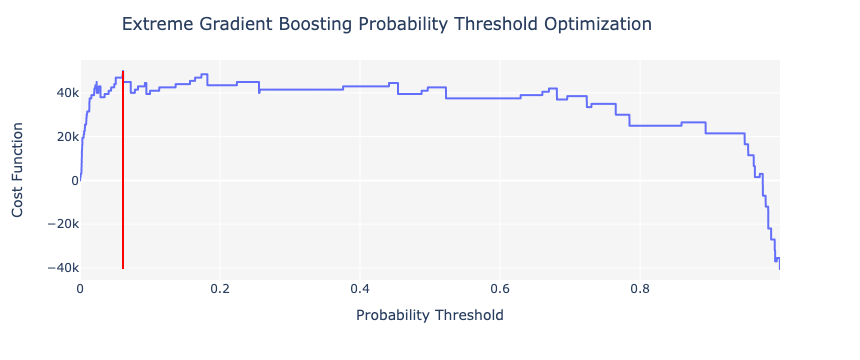

Optimized Probability Threshold: 0.0614 | Optimized Cost Function: 50000


0.0614

In [64]:
pc.optimize_threshold(tuned_xgboost_optimized, true_negative=1500, false_negative=-5000)

## Interpret Model

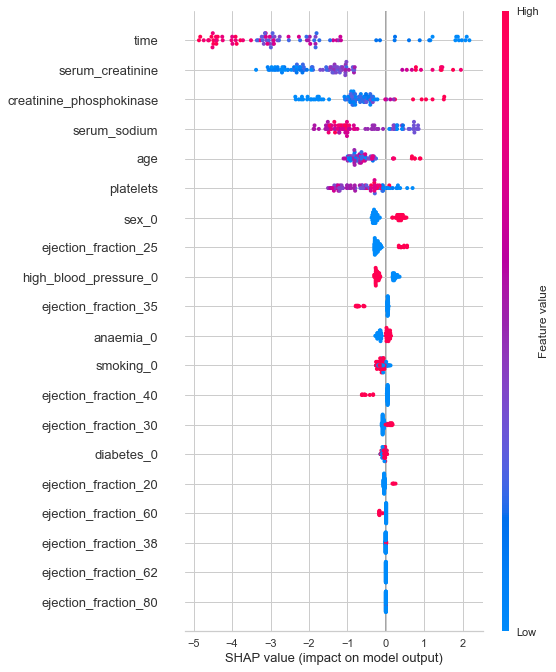

In [65]:
pc.interpret_model(tuned_xgboost_optimized)

In [66]:
final_xgb_model = pc.finalize_model(tuned_xgboost_optimized)

## Predict the Model


In [67]:
new_data = df.copy()

In [68]:
new_data.drop('label', axis=1, inplace=True)

In [69]:
prediction = pc.predict_model(final_xgb_model, data = new_data)

In [70]:
prediction[130:150]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
130  53.0        1                      1808         0                 60   
131  60.0        1                      1082         1                 45   
132  46.0        0                       719         0                 40   
133  63.0        0                       193         0                 60   
134  81.0        0                      4540         0                 35   
135  75.0        0                       582         0                 40   
136  65.0        1                        59         1                 60   
137  68.0        1                       646         0                 25   
138  62.0        0                       281         1                 35   
139  50.0        0                      1548         0                 30   
140  80.0        0                       805         0                 38   
141  46.0        1                       291         0                 35   
142  50.0        0                       482         1                 30   
143  61.0        1                        84         0                 40   
144  72.0        1                       943         0                 25   
145  50.0        0                       185         0                 30   
146  52.0        0                       132         0                 30   
147  64.0        0                      1610         0                 60   
148  75.0        1                       582         0                 30   
149  60.0        0                      2261         0                 35   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
130                    1  249000.00              0.70           138    1   
131                    0  250000.00              6.10           131    1   
132                    1  263358.03              1.18           137    0   
133                    1  295000.00              1.30           145    1   
134                    0  231000.00              1.18           137    1   
135                    0  263358.03              1.18           137    1   
136                    0  172000.00              0.90           137    0   
137                    0  305000.00              2.10           130    1   
138                    0  221000.00              1.00           136    0   
139                    1  211000.00              0.80           138    1   
140                    0  263358.03              1.10           134    1   
141                    0  348000.00              0.90           140    0   
142                    0  329000.00              0.90           132    0   
143                    1  229000.00              0.90           141    0   
144                    1  338000.00              1.70           139    1   
145                    0  266000.00              0.70           141    1   
146                    0  218000.00              0.70           136    1   
147                    0  242000.00              1.00           137    1   
148                    0  225000.00              1.83           134    1   
149                    1  228000.00              0.90           136    1   

     smoking  time  Label   Score  
130        1   106      0  0.9956  
131        0   107      1  0.5788  
132        0   107      0  0.9950  
133        1   107      0  0.9563  
134        1   107      0  0.8789  
135        0   107      0  0.9754  
136        0   107      0  0.9808  
137        0   108      1  0.8249  
138        0   108      0  0.9111  
139        0   108      0  0.9613  
140        0   109      1  0.8189  
141        0   109      0  0.9605  
142        0   109      0  0.8971  
143        0   110      0  0.9977  
144        1   111      1  0.9825  
145        1   112      0  0.9967  
146        1   112      0  0.9708  
147        0   113      0  0.8838  
148        0   113      1  0.9848  
149        0   115      0  0.9108

In [71]:
prediction.iloc[[-1]]

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
298                    0   395000.0               1.6           136    1   

     smoking  time  Label   Score  
298        1   285      0  0.9493

## Conclusion

+ PyCaret is an open-source automates machine learning workflows.
+ For data oreparation use the setup() function.
+ Now that data preparation is done, we start the training process by using compare_models functionality.
+ Create and optimize the selected algorithm through create_model and tune_model
+ Analyze model through evaluate_model 
+ Interpret model by interpet_model() through SHAP values that do not tell you anything about model performance but instead, interpret the impact of having a certain value for a given feature in comparison to the prediction we’d make if that feature took some baseline value.
+ Finalize model by finalize_model()
+ Predict model by predict_model() to apply the tuned model to new leads to generate the score.

## Time for an exercise

# <b> END OF EXAMPLE SESSION 2